<a href="https://colab.research.google.com/github/mbraja10/lms/blob/main/Sales_of_Video_Games_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Setup
options(scipen=999)  # turn off scientific notation like 1e+06
install.packages("ggplot2")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(ggplot2)

In [6]:
data=read.csv("/content/vgsales.csv")

In [ ]:
data

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [7]:
head(data)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


### Discard non-useful data

Discard the “Rank” column because it is a variable that ordered the global sales value, so there is no point in using it. The “Name” column is also discarded because it has a lesser chance of being a potential for this study and requires considerable work. Finally, all other sales columns are also discarded because the objective is to analyze only the relationship of the global sales value.

In [8]:
data$Rank <- NULL
data$Name <- NULL
data$NA_Sales <- NULL
data$JP_Sales <- NULL
data$EU_Sales <- NULL
data$Other_Sales <- NULL

Set the correct type of features and drop NA’s

In [9]:
data$Platform <- as.factor(data$Platform)
data$Genre <- as.factor(data$Genre)
data$Year <- as.numeric(data$Year)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Features

Platform

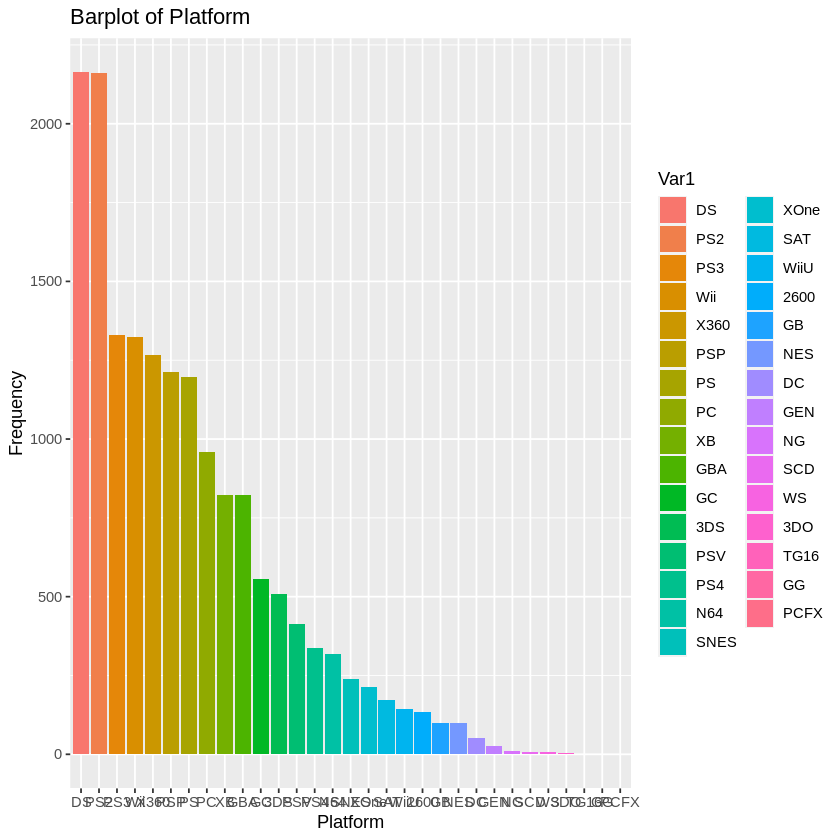

In [10]:
plataformFreq <- as.data.frame(sort(table(data$Platform), decreasing = TRUE))
ggplot(plataformFreq, aes(x=Var1, y=Freq, fill=Var1))+
  ggtitle("Barplot of Platform")+
  xlab("Platform")+
  ylab("Frequency")+
  geom_bar(stat="identity")

In the histogram it is possible to identify platforms (e.g. GG and PCFX) that have a small amount of records and therefore will have inaccurate results. In an implementation of a model, these values can be ignored or aggregated with a new value of type “others”. On the violin chart, the number of unique values has been reduced so that you can have a more friendly image. It was also necessary to limit the y to one since the “global sales” field contains many oultiers. Later on, more graphics will be implemented to relate platforms to other attributes, but it is notable that only using the video game platform can more or less likely values be considered.

Year

Warning message:
“Removed 1641 rows containing non-finite values (`stat_ydensity()`).”


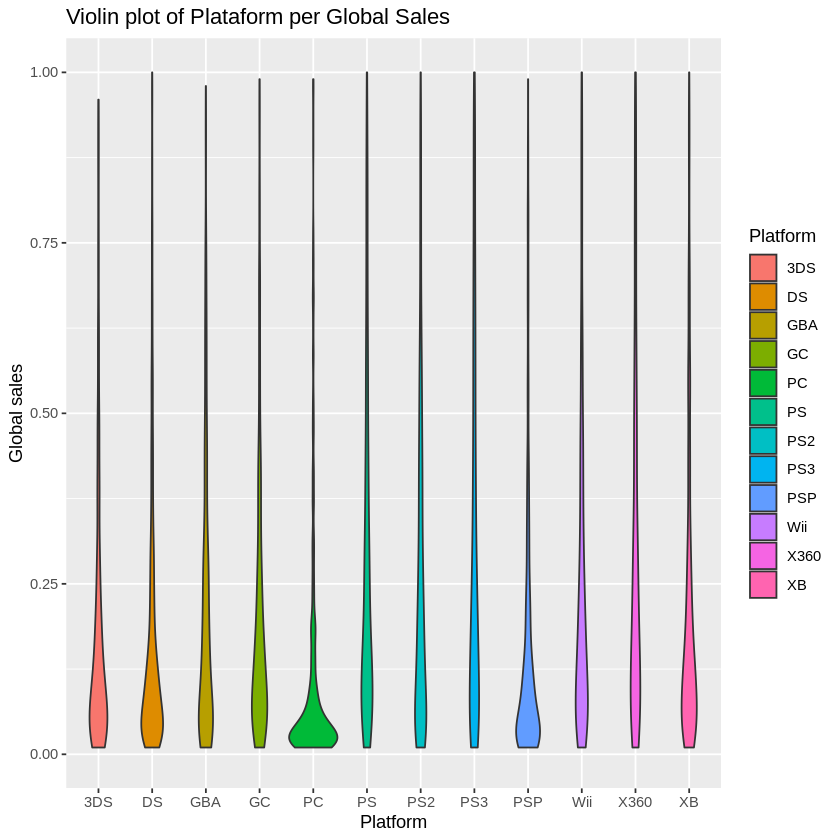

In [11]:
ggplot(subset(data, Platform %in% c("DS", "PS2", "PS3", "Wii", "X360", "PSP", "PS", "PC", "XB", "GBA", "GC", "3DS")), aes(Platform, Global_Sales, fill=Platform))+
ggtitle("Violin plot of Plataform per Global Sales")+
geom_violin()+
ylim(c(0,1))+
labs(x="Platform", y="Global sales")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 271 rows containing non-finite values (`stat_bin()`).”


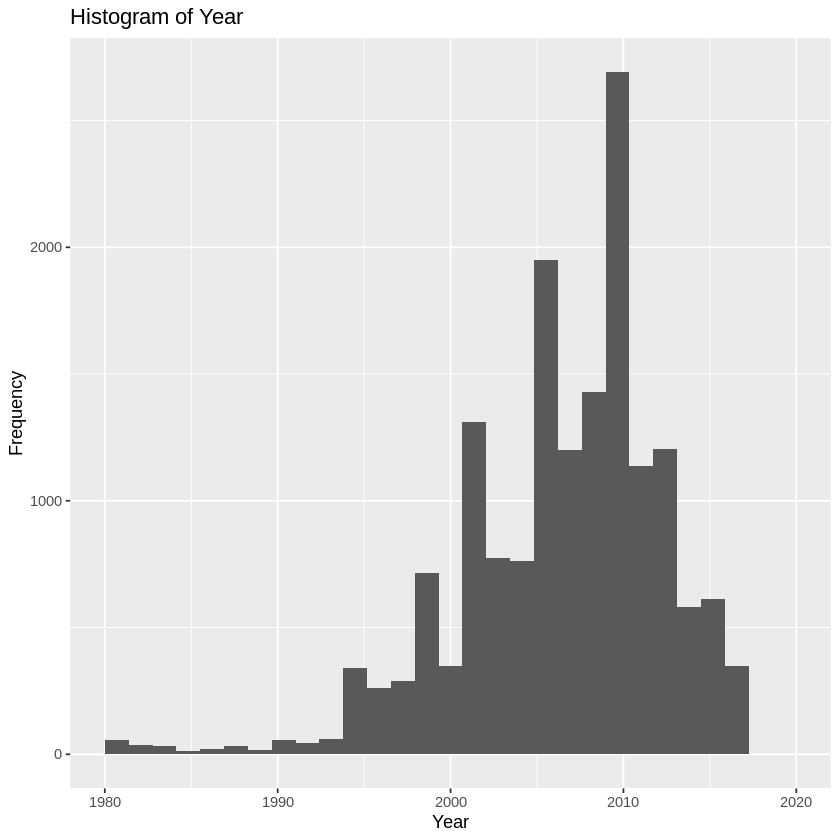

In [12]:
ggplot(data, aes(x=Year))+
  ggtitle("Histogram of Year")+
  xlab("Year")+
  ylab("Frequency")+
  geom_bar(stat="bin")

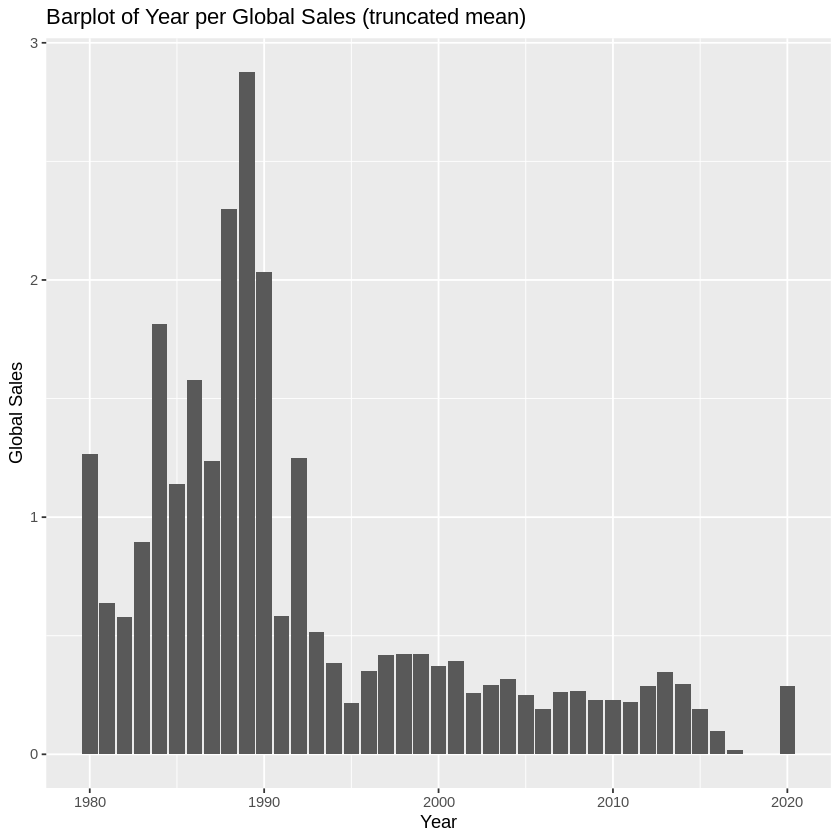

In [13]:
yearTable <- as.data.frame(aggregate(Global_Sales ~ Year, data, mean, trim=0.1))
ggplot(yearTable, aes(x=Year, y=Global_Sales))+
  ggtitle("Barplot of Year per Global Sales (truncated mean)")+
  xlab("Year")+
  ylab("Global Sales")+
  geom_bar(stat="identity")

There are only a few records before the year 1994 approximately, which makes the average sales a little bit uncertain. It does not make sense for games to sell more than after 2000, since the video game market is only growing. Another hypothesis is that with more games on the market, the market division is bigger and it is difficult to get out of the average.

Warning message:
“Removed 249 rows containing missing values (`position_stack()`).”


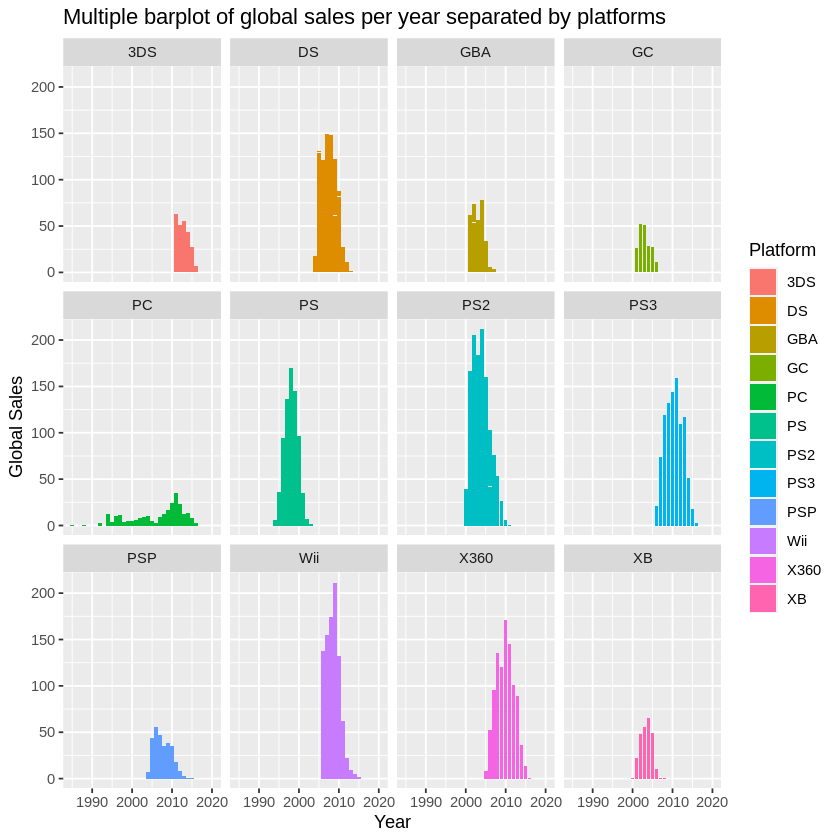

In [14]:
ggplot(subset(data, Platform %in% c("DS", "PS2", "PS3", "Wii", "X360", "PSP", "PS", "PC", "XB", "GBA", "GC", "3DS")), aes(x=Year, y=Global_Sales, fill=Platform))+
ggtitle("Multiple barplot of global sales per year separated by platforms")+
geom_bar(stat="identity")+
labs(x="Year", y="Global Sales")+
facet_wrap("Platform")

For each platform, the global sales for each year are influenced by the cycle of the video game. For example, it is possible to identify the same point at the end of the PS and at the beginning of the PS2. But there is a transition period for these platforms that have the same manufacturer, as the chart below depicts. And to be more likely to sell more, a publisher needs to hit the peak of each platform.

Warning message:
“Removed 66 rows containing missing values (`position_stack()`).”


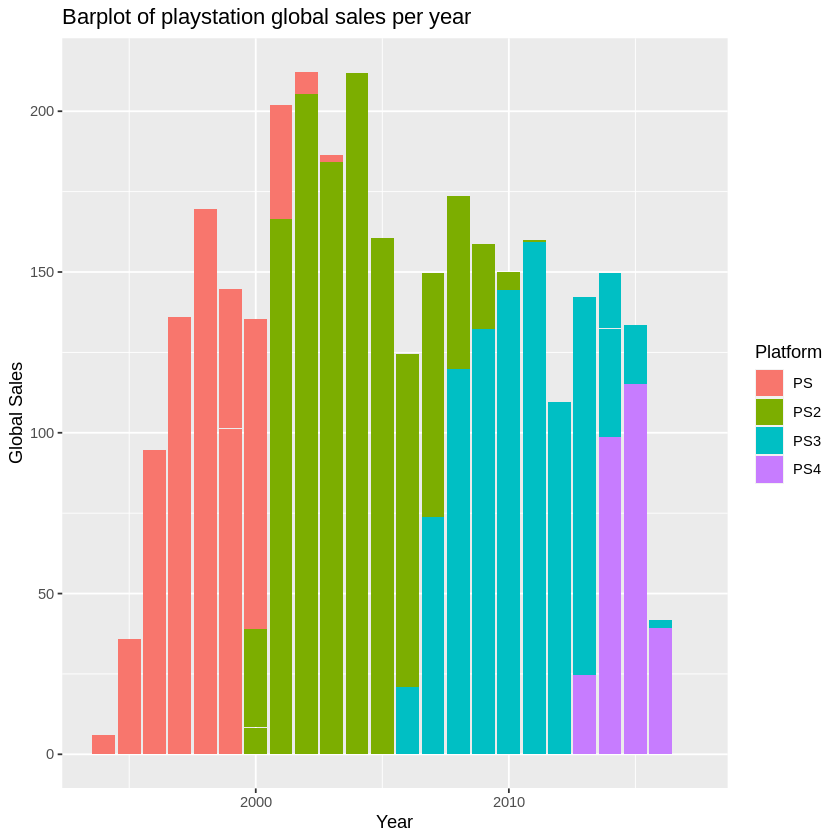

In [15]:
ggplot(subset(data, Platform %in% c("PS", "PS2", "PS3", "PS4")), aes(x=Year, y=Global_Sales, fill=Platform))+
ggtitle("Barplot of playstation global sales per year")+
geom_bar(stat="identity")+
labs(x="Year", y="Global Sales")

Genre

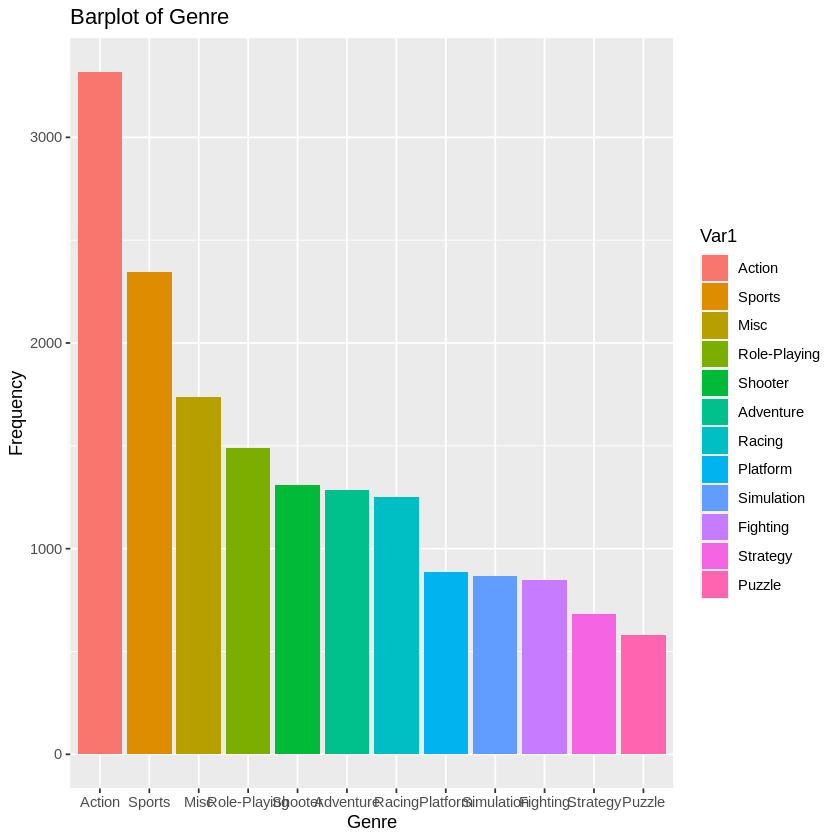

In [16]:
genreFreq <- as.data.frame(sort(table(data$Genre), decreasing = TRUE))
ggplot(genreFreq, aes(x=Var1, y=Freq, fill=Var1))+
  ggtitle("Barplot of Genre")+
  xlab("Genre")+
  ylab("Frequency")+
  geom_bar(stat="identity")

Warning message:
“Removed 2054 rows containing non-finite values (`stat_ydensity()`).”


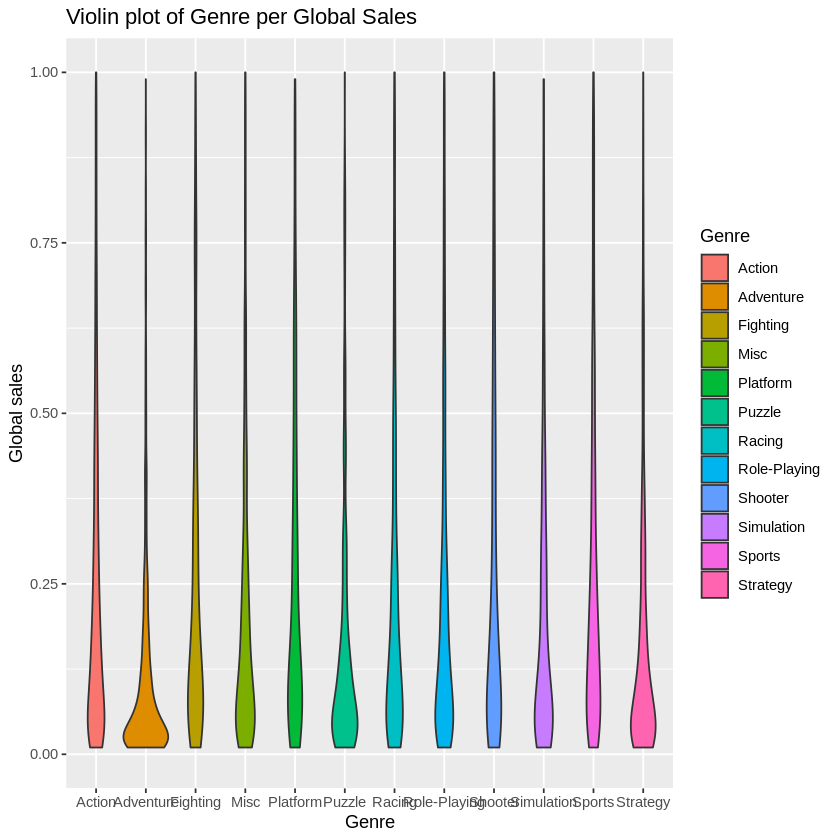

In [17]:
ggplot(data, aes(Genre, Global_Sales, fill=Genre))+
ggtitle("Violin plot of Genre per Global Sales")+
geom_violin()+
ylim(c(0,1))+
labs(x="Genre", y="Global sales")

The global sales values do not vary much according to the genre of the game, only Adventure, Puzzle and Strategy have a concentration in lower values.

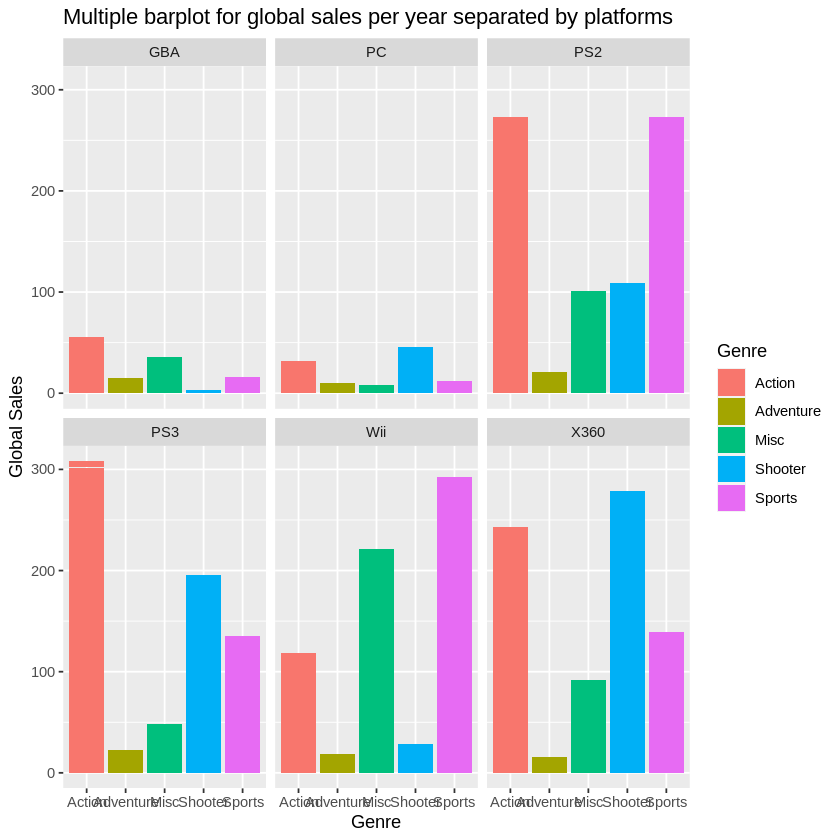

In [18]:
ggplot(
  subset(data, Platform %in% c('GBA', 'PC', 'Wii', 'X360', 'PS2', 'PS3') &
          Genre %in% c('Action', 'Sports', 'Misc', 'Role-playing', 'Shooter', 'Adventure')),
  aes(x=Genre, y=Global_Sales, fill=Genre))+
  ggtitle("Multiple barplot for global sales per year separated by platforms")+
geom_bar(stat="identity")+
labs(x='Genre', y='Global Sales')+
facet_wrap('Platform')

It is possible to notice that each platform has its genres that tend to sell more. This happens with the Wii for example, which sells more sports games, different action

Warning message:
“Removed 271 rows containing missing values (`position_stack()`).”


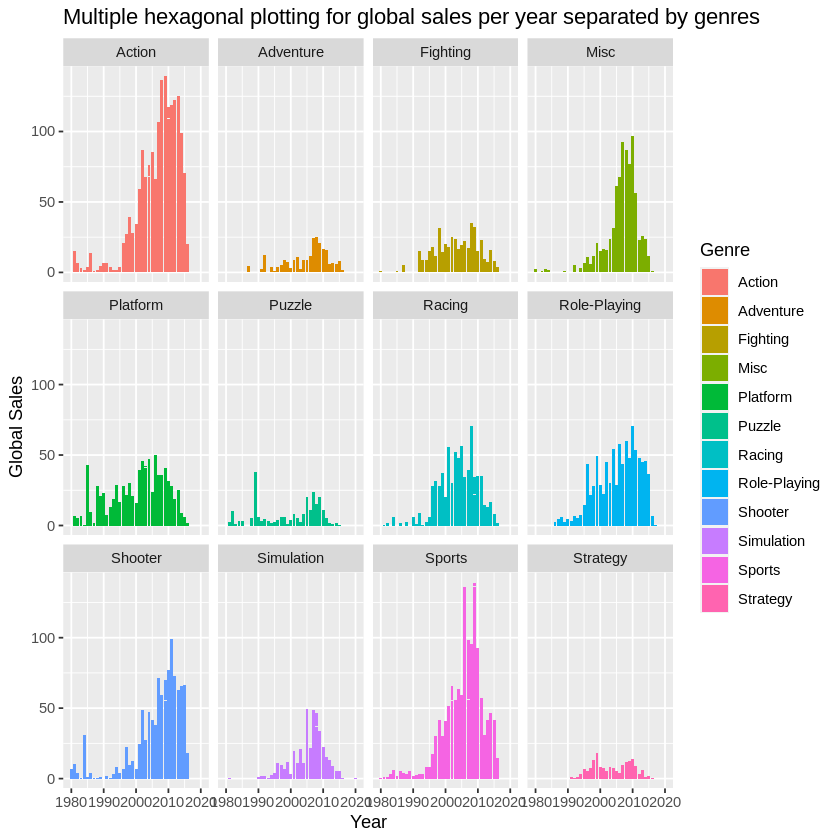

In [19]:
ggplot(data, aes(x=as.numeric(Year), y=Global_Sales, fill=Genre))+
ggtitle("Multiple hexagonal plotting for global sales per year separated by genres")+
geom_bar(stat="identity")+
labs(x='Year', y='Global Sales')+
facet_wrap('Genre')

In this plot above, it is noted that the year may influence the sales of certain types. There is also a new possibility when comparing with the chart “Multiple barplot of global sales per year separated by platforms” it is noted that the sales cycle in sports games is similar to that of the Wii platform. Therefore, it is possible that a platform will contribute to the rise of a genre in the sales of video games or that the interest in certain genres will influence the sales of a platform. So if there is a very good experience in playing a certain genre on a platform, it could be that both have a peak in sales. The same goes for the rise of sales in action games with the playstation/xbox cycle.

Publisher

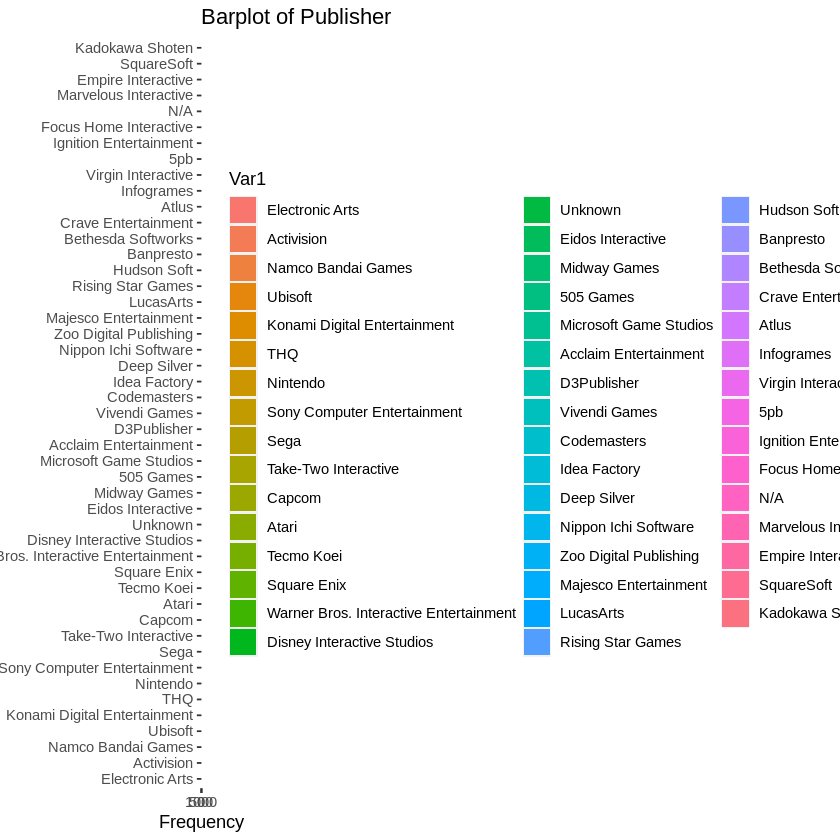

In [20]:
publisherFreq <- as.data.frame(sort(table(data$Publisher), decreasing = TRUE))
ggplot(subset(publisherFreq, Freq >= 50), aes(x=Var1, y=Freq, fill=Var1))+
  ggtitle("Barplot of Publisher")+
  xlab("Publisher")+
  ylab("Frequency")+
  coord_flip()+
  geom_bar(stat="identity")

Warning message:
“Removed 1145 rows containing non-finite values (`stat_ydensity()`).”


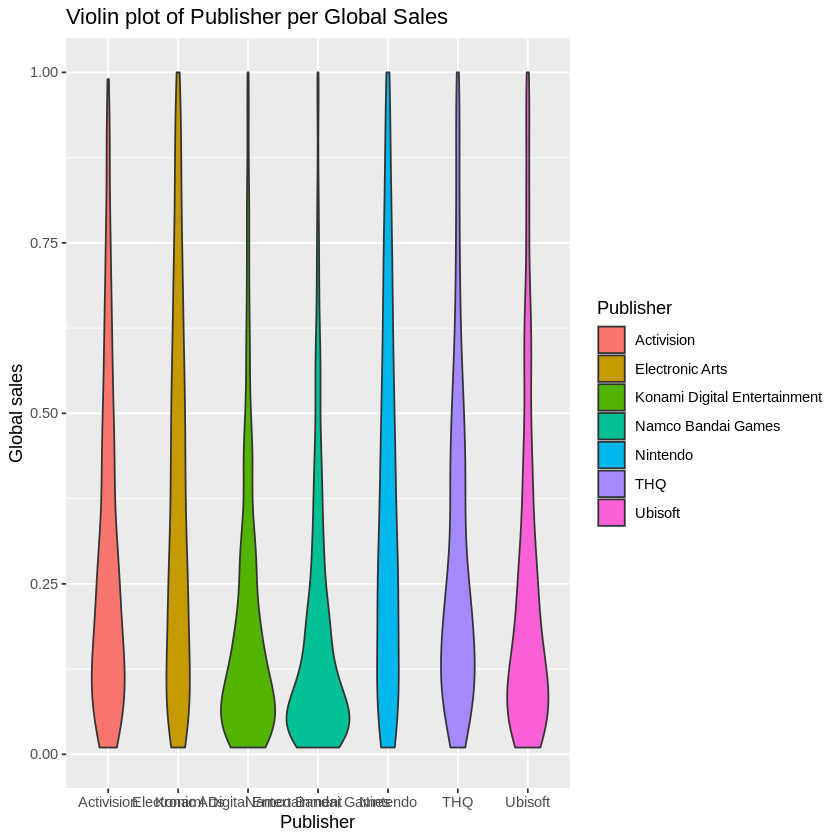

In [21]:
ggplot(subset(data, Publisher %in% c("Electronic Arts", "Activision", "Namco Bandai Games", "Ubisoft", "Konami Digital Entertainment", "THQ", "Nintendo")), aes(Publisher, Global_Sales, fill=Publisher))+
ggtitle("Violin plot of Publisher per Global Sales")+
geom_violin()+
ylim(c(0,1))+
labs(x="Publisher", y="Global sales")

Publishers have quite different global sales distributions. Nintendo and EA appear to be the largest concentration of high sales figures.

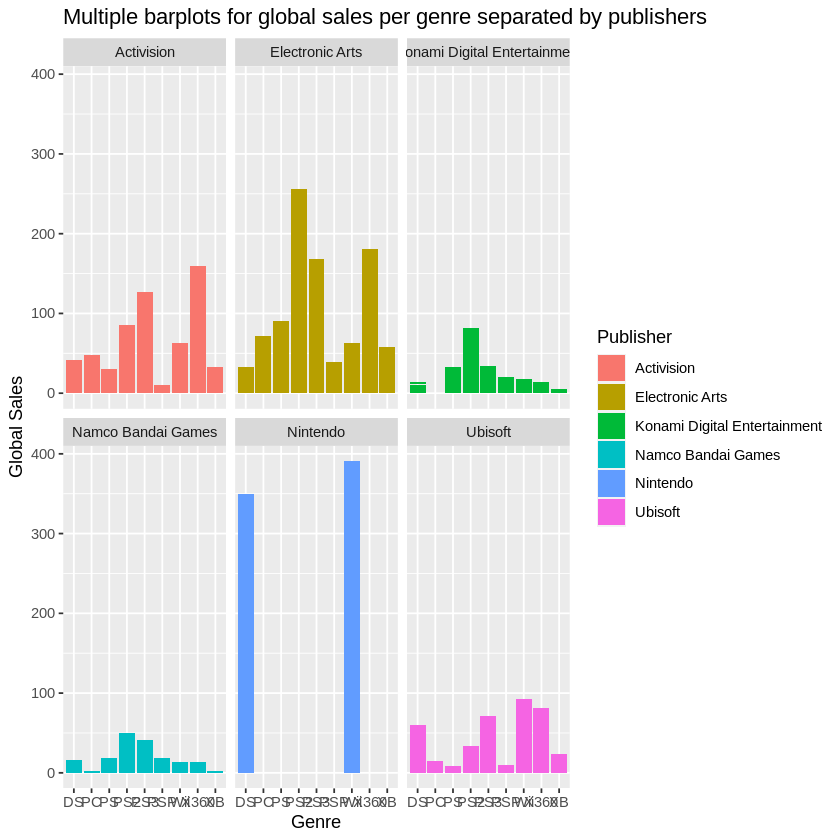

In [22]:
ggplot(
  subset(data,
         Publisher %in% c("Electronic Arts", "Activision", "Namco Bandai Games", "Ubisoft", "Konami Digital Entertainment", "Nintendo") &
         Platform %in% c("DS", "PS2", "PS3", "Wii", "X360", "PSP", "PS", "PC", "XB")),
  aes(x=Platform, y=Global_Sales, fill=Publisher))+
ggtitle('Multiple barplots for global sales per genre separated by publishers')+
geom_bar(stat="identity")+
labs(x='Genre', y='Global Sales')+
facet_wrap('Publisher')

It is also possible to see that the publishers had different strategies in relation to the platforms. Note that Nintendo only produced video games for DS and Wii platforms. On the other hand, EA has experienced a bit of everything. It is worth mentioning that a Nintendo opted for platforms that the company itself is also a manufacturer. This makes it possible to hypothesize about a new feature, such as a new “PublisherIsManufacturer” column. There is a example above with Sony and Nintendo:

Warning message:
“Removed 467 rows containing non-finite values (`stat_ydensity()`).”


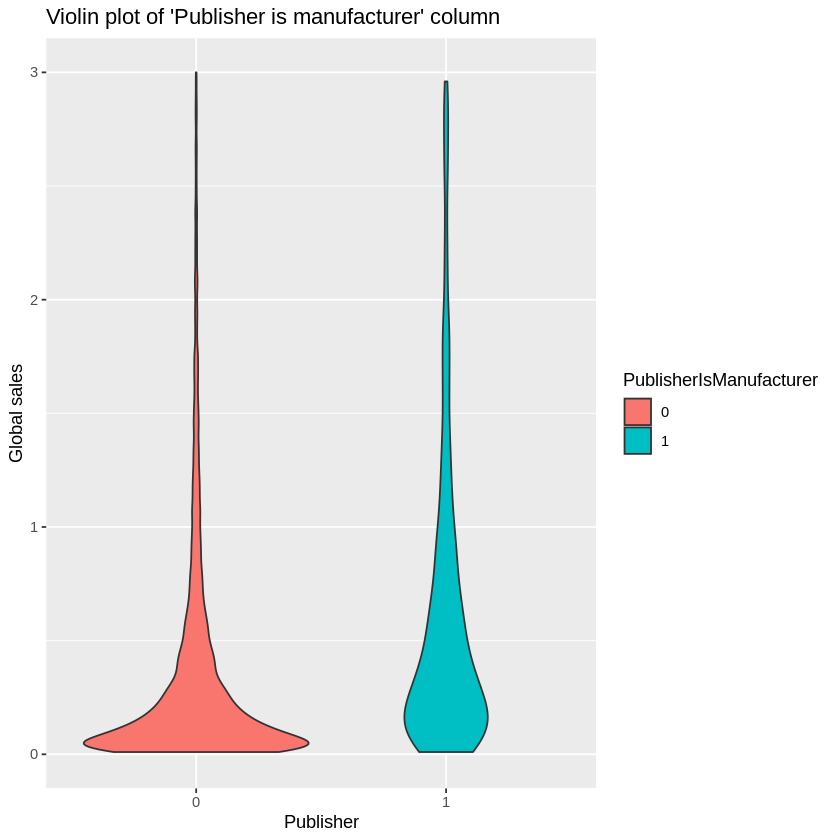

In [23]:
data$PublisherIsManufacturer <- as.factor(ifelse(
  (data$Platform %in% c("PS", "PS1", "PS2", "PS3")
  & data$Publisher == 'Sony Computer Entertainment')
  |
  (data$Platform %in% c("DS", "Wii")
  & data$Publisher == 'Nintendo'), 1, 0))
ggplot(data, aes(PublisherIsManufacturer, Global_Sales, fill=PublisherIsManufacturer))+
ggtitle("Violin plot of 'Publisher is manufacturer' column")+
geom_violin()+
ylim(c(0,3))+
labs(x="Publisher", y="Global sales")

As mentioned above, it is just an example with only two manufacturers and there is a difference in values, it may be promising to delve into this new feature.

Warning message:
“Removed 44 rows containing missing values (`position_stack()`).”


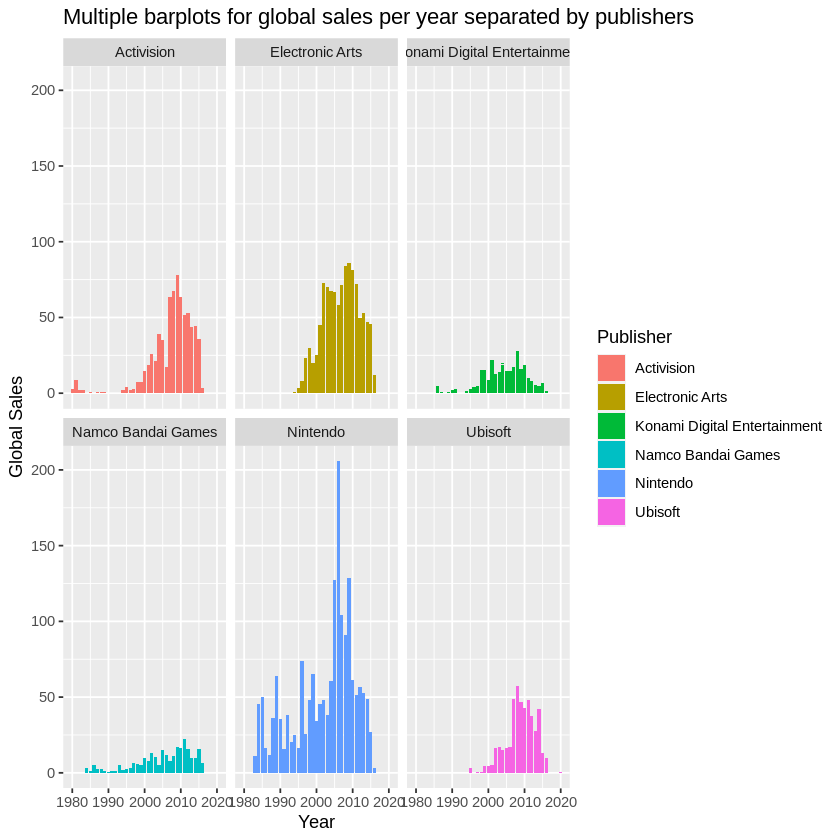

In [24]:
ggplot(
subset(data, Publisher %in% c("Electronic Arts", "Activision", "Namco Bandai Games", "Ubisoft", "Konami Digital Entertainment", "Nintendo")),
aes(x=Year, y=Global_Sales, fill=Publisher))+
ggtitle('Multiple barplots for global sales per year separated by publishers')+
labs(x='Year', y='Global Sales')+
geom_bar(stat="identity")+
facet_wrap('Publisher')

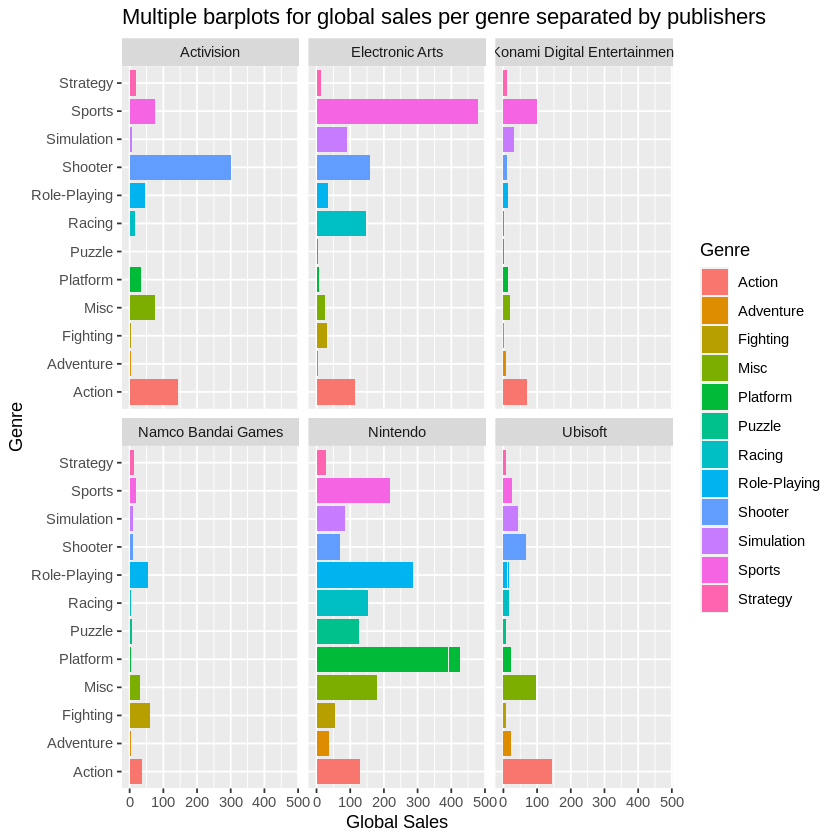

In [25]:
ggplot(
  subset(data, Publisher %in% c("Electronic Arts", "Activision", "Namco Bandai Games", "Ubisoft", "Konami Digital Entertainment", "Nintendo")),
  aes(x=Genre, y=Global_Sales, fill=Genre))+
  ggtitle('Multiple barplots for global sales per genre separated by publishers')+
geom_bar(stat="identity")+
labs(x='Genre', y='Global Sales')+
coord_flip()+
facet_wrap('Publisher')

Finally, the last graph shows the information that each publisher has its main genre, an Activion for Shooter, Nintendo for Platform and EA for Sports. This is not to say that other platforms may also have been successful with these genres or that the publishers cited have not explored others, but they were references as types of games.